In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("weather_data.csv")

In [3]:
df

,day,temp,condition
0,Monday,12,Sunny
1,Tuesday,14,Rain
2,Wednesday,15,Rain
3,Thursday,14,Cloudy
4,Friday,21,Sunny
5,Saturday,22,Sunny
6,Sunday,24,Sunny


In [4]:
df.day

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
5     Saturday
6       Sunday
Name: day, dtype: object

In [6]:
df.temp

0    12
1    14
2    15
3    14
4    21
5    22
6    24
Name: temp, dtype: int64

<AxesSubplot:>

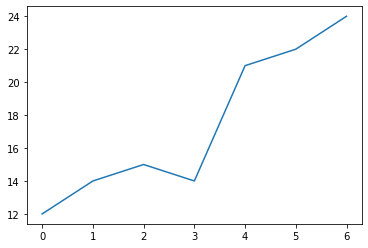

In [7]:
df.temp.plot()

<AxesSubplot:>

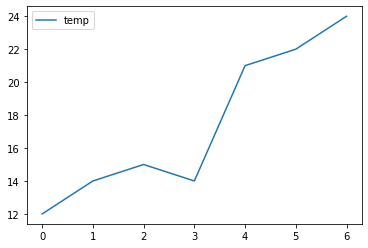

In [8]:
df.plot()